In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
kidnappe=pd.read_csv('Specific_purpose_of_kidnapping_and_abduction.csv')
kidnappe.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,Male_10_15_Years,Male_15_18_Years,Male_18_30_Years,Male_30_50_Years,Male_Above_50_Years,Male_Total,Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
kidnappe.tail()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,Male_10_15_Years,Male_15_18_Years,Male_18_30_Years,Male_30_50_Years,Male_Above_50_Years,Male_Total,Male_Upto_10_Years
3564,Tamil Nadu,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),1720.0,41.0,431.0,874.0,103.0,5.0,1467.0,13.0,1726.0,5.0,2.0,89.0,145.0,11.0,259.0,7.0
3565,Tripura,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),114.0,8.0,11.0,57.0,18.0,0.0,94.0,NaN,130.0,2.0,0.0,17.0,15.0,1.0,36.0,1.0
3566,Uttar Pradesh,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),6321.0,169.0,906.0,3682.0,699.0,0.0,5468.0,12.0,6323.0,59.0,48.0,460.0,247.0,10.0,855.0,31.0
3567,Uttarakhand,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),286.0,NaN,1.0,217.0,31.0,NaN,249.0,NaN,286.0,3.0,5.0,25.0,4.0,NaN,37.0,NaN
3568,West Bengal,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),3345.0,50.0,211.0,1573.0,840.0,98.0,2786.0,14.0,3391.0,24.0,23.0,284.0,229.0,35.0,605.0,10.0


In [6]:
df=pd.DataFrame(data=kidnappe)
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,Male_10_15_Years,Male_15_18_Years,Male_18_30_Years,Male_30_50_Years,Male_Above_50_Years,Male_Total,Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.tail(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,Male_10_15_Years,Male_15_18_Years,Male_18_30_Years,Male_30_50_Years,Male_Above_50_Years,Male_Total,Male_Upto_10_Years
3559,Odisha,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),1016.0,20.0,33.0,822.0,36.0,0.0,912.0,1.0,1016.0,0.0,0.0,76.0,27.0,0.0,104.0,1.0
3560,Puducherry,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),17.0,2.0,5.0,6.0,NaN,NaN,16.0,3.0,20.0,NaN,NaN,1.0,1.0,NaN,4.0,2.0
3561,Punjab,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),789.0,76.0,263.0,253.0,3.0,1.0,600.0,4.0,799.0,7.0,10.0,84.0,63.0,5.0,199.0,30.0
3562,Rajasthan,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),2985.0,163.0,537.0,1390.0,315.0,8.0,2432.0,19.0,2998.0,23.0,43.0,289.0,174.0,25.0,566.0,12.0
3563,Sikkim,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),6.0,1.0,5.0,NaN,NaN,NaN,6.0,NaN,7.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
3564,Tamil Nadu,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),1720.0,41.0,431.0,874.0,103.0,5.0,1467.0,13.0,1726.0,5.0,2.0,89.0,145.0,11.0,259.0,7.0
3565,Tripura,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),114.0,8.0,11.0,57.0,18.0,0.0,94.0,NaN,130.0,2.0,0.0,17.0,15.0,1.0,36.0,1.0
3566,Uttar Pradesh,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),6321.0,169.0,906.0,3682.0,699.0,0.0,5468.0,12.0,6323.0,59.0,48.0,460.0,247.0,10.0,855.0,31.0
3567,Uttarakhand,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),286.0,NaN,1.0,217.0,31.0,NaN,249.0,NaN,286.0,3.0,5.0,25.0,4.0,NaN,37.0,NaN
3568,West Bengal,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),3345.0,50.0,211.0,1573.0,840.0,98.0,2786.0,14.0,3391.0,24.0,23.0,284.0,229.0,35.0,605.0,10.0


In [8]:
df.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name', 'Cases_Reported',
       'Female_10_15_Years', 'Female_15_18_Years', 'Female_18_30_Years',
       'Female_30_50_Years', 'Female_Above_50_Years', 'Female_Total',
       'Female_Upto_10_Years', 'Grand_Total', 'Male_10_15_Years',
       'Male_15_18_Years', 'Male_18_30_Years', 'Male_30_50_Years',
       'Male_Above_50_Years', 'Male_Total', 'Male_Upto_10_Years'],
      dtype='object')

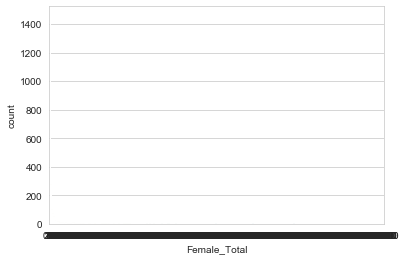

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Female_Total',data=df,palette='YlGnBu')

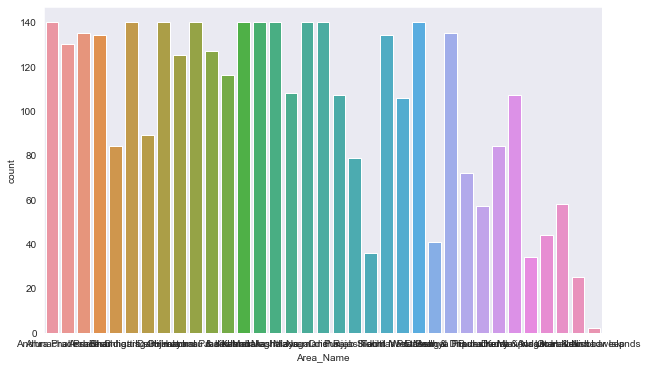

In [11]:
sns.set_style('dark')
plt.figure(figsize=(10,6))
sns.countplot(x='Area_Name',data=df)

In [7]:
df['Area_Name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Maharashtra', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Uttar Pradesh',
       'West Bengal', 'Daman & Diu', 'Madhya Pradesh', 'Tripura',
       'Puducherry', 'Kerala', 'Manipur', 'Dadra & Nagar Haveli', 'Goa',
       'Uttarakhand', 'Andaman & Nicobar Islands', 'Lakshadweep'],
      dtype=object)

In [8]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [31]:
len(df['Group_Name'].unique())

14

In [10]:
df['Sub_Group_Name'].unique()

array(['01. For Adoption', '02. For Begging', '03. for Camel Racing',
       '04. For Illicit Intercourse', '05. For Marriage',
       '06. For Prostitution', '07. For Ransom', '08. For Revenge',
       '09. For Sale', '10. For Selling Bodyparts', '11. For Slavery',
       '12. For Unlawful Activity', '13. Other Purposes',
       '14. Total (Sum of 1-13 Above)'], dtype=object)

In [12]:
len(df['Sub_Group_Name'].unique())

14

In [13]:
max_m=df['Female_Total'].max()
max_m

5468.0

In [14]:
min_m=df['Female_Total'].min()
min_m

0.0

In [15]:
max_m=df['Male_Total'].max()
max_m

2465.0

In [16]:
min_m=df['Male_Total'].min()
min_m

0.0

In [17]:
df.describe()

,Year,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,Male_10_15_Years,Male_15_18_Years,Male_18_30_Years,Male_30_50_Years,Male_Above_50_Years,Male_Total,Male_Upto_10_Years
count,3569.000000,3562.000000,3178.000000,3231.000000,3260.000000,3119.000000,2948.000000,3407.000000,3074.000000,3510.000000,3086.000000,3081.000000,3202.000000,3152.000000,3011.000000,3312.000000,3098.000000
mean,2005.511348,148.565974,7.538074,22.177035,73.412270,13.818532,0.424016,112.811858,1.648016,152.707123,2.922878,3.433950,24.595878,13.211294,1.357024,45.788647,2.442866
std,2.846296,448.284257,30.890446,87.900702,233.690193,59.512218,3.159056,357.903029,9.980573,455.339382,26.096192,16.317734,91.578782,45.827576,5.336803,157.944194,16.911023
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2008.000000,52.000000,2.000000,4.000000,20.250000,2.000000,0.000000,30.000000,0.000000,57.000000,0.000000,0.000000,7.000000,4.000000,0.000000,14.000000,1.000000
max,2010.000000,6321.000000,664.000000,1714.000000,3682.000000,880.000000,98.000000,5468.000000,176.000000,6323.000000,909.000000,380.000000,1371.000000,1042.000000,128.000000,2465.000000,366.000000


In [18]:
meank=df['Female_Total'].mean()
meank                                                      # Average of kidnappe in each state

112.81185793953625

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3569 entries, 0 to 3568
Data columns (total 20 columns):
Area_Name                3569 non-null object
Year                     3569 non-null int64
Group_Name               3569 non-null object
Sub_Group_Name           3569 non-null object
Cases_Reported           3562 non-null float64
Female_10_15_Years       3178 non-null float64
Female_15_18_Years       3231 non-null float64
Female_18_30_Years       3260 non-null float64
Female_30_50_Years       3119 non-null float64
Female_Above_50_Years    2948 non-null float64
Female_Total             3407 non-null float64
Female_Upto_10_Years     3074 non-null float64
Grand_Total              3510 non-null float64
Male_10_15_Years         3086 non-null float64
Male_15_18_Years         3081 non-null float64
Male_18_30_Years         3202 non-null float64
Male_30_50_Years         3152 non-null float64
Male_Above_50_Years      3011 non-null float64
Male_Total               3312 non-null float64
Male_

In [20]:
df.dtypes

Area_Name                 object
Year                       int64
Group_Name                object
Sub_Group_Name            object
Cases_Reported           float64
Female_10_15_Years       float64
Female_15_18_Years       float64
Female_18_30_Years       float64
Female_30_50_Years       float64
Female_Above_50_Years    float64
Female_Total             float64
Female_Upto_10_Years     float64
Grand_Total              float64
Male_10_15_Years         float64
Male_15_18_Years         float64
Male_18_30_Years         float64
Male_30_50_Years         float64
Male_Above_50_Years      float64
Male_Total               float64
Male_Upto_10_Years       float64
dtype: object

In [21]:
df.isnull().sum()

Area_Name                  0
Year                       0
Group_Name                 0
Sub_Group_Name             0
Cases_Reported             7
Female_10_15_Years       391
Female_15_18_Years       338
Female_18_30_Years       309
Female_30_50_Years       450
Female_Above_50_Years    621
Female_Total             162
Female_Upto_10_Years     495
Grand_Total               59
Male_10_15_Years         483
Male_15_18_Years         488
Male_18_30_Years         367
Male_30_50_Years         417
Male_Above_50_Years      558
Male_Total               257
Male_Upto_10_Years       471
dtype: int64

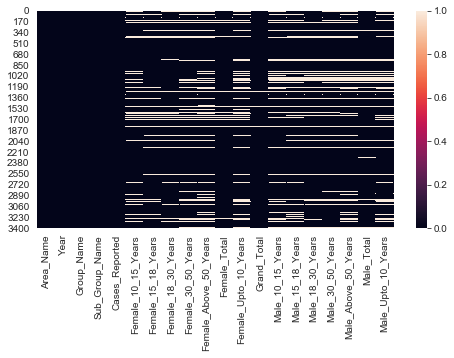

In [22]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull())

In [23]:
dfcorr=df.corr()
dfcorr

,Year,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,Male_10_15_Years,Male_15_18_Years,Male_18_30_Years,Male_30_50_Years,Male_Above_50_Years,Male_Total,Male_Upto_10_Years
Year,1.000000,0.062706,0.065658,0.076266,0.072603,0.064567,0.025874,0.080133,0.049060,0.062113,0.045193,-0.000663,0.005076,-0.015044,0.001641,0.009067,0.034444
Cases_Reported,0.062706,1.000000,0.632008,0.781428,0.918512,0.755257,0.322603,0.960238,0.386245,0.999384,0.376134,0.605306,0.708926,0.697125,0.550261,0.776865,0.371654
Female_10_15_Years,0.065658,0.632008,1.000000,0.758431,0.427139,0.296872,0.172765,0.609120,0.789201,0.644925,0.774346,0.718250,0.262800,0.292206,0.251707,0.517837,0.789885
Female_15_18_Years,0.076266,0.781428,0.758431,1.000000,0.661886,0.458042,0.211230,0.813448,0.462145,0.785233,0.436254,0.590560,0.344680,0.346275,0.284261,0.474189,0.439989
Female_18_30_Years,0.072603,0.918512,0.427139,0.661886,1.000000,0.781101,0.290362,0.964023,0.164737,0.913845,0.142629,0.370438,0.517247,0.503204,0.392368,0.521998,0.138046
Female_30_50_Years,0.064567,0.755257,0.296872,0.458042,0.781101,1.000000,0.340033,0.798797,0.118552,0.750567,0.107873,0.266215,0.392521,0.422837,0.351889,0.406384,0.095083
Female_Above_50_Years,0.025874,0.322603,0.172765,0.211230,0.290362,0.340033,1.000000,0.316175,0.135719,0.323014,0.055683,0.187506,0.213426,0.257200,0.283153,0.240336,0.083710
Female_Total,0.080133,0.960238,0.609120,0.813448,0.964023,0.798797,0.316175,1.000000,0.332515,0.958934,0.302960,0.502835,0.504912,0.505613,0.403051,0.572026,0.304396
Female_Upto_10_Years,0.049060,0.386245,0.789201,0.462145,0.164737,0.118552,0.135719,0.332515,1.000000,0.402023,0.733837,0.600258,0.153296,0.193950,0.178270,0.425989,0.945203
Grand_Total,0.062113,0.999384,0.644925,0.785233,0.913845,0.750567,0.323014,0.958934,0.402023,1.000000,0.395382,0.617441,0.706981,0.695943,0.550900,0.781490,0.388667


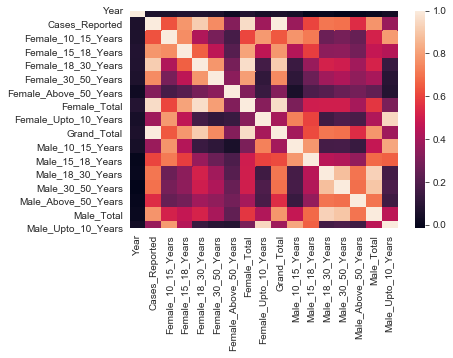

In [24]:
sns.heatmap(dfcorr)

In [25]:
meandf=df['Grand_Total'].mean()
meandf

152.7071225071225

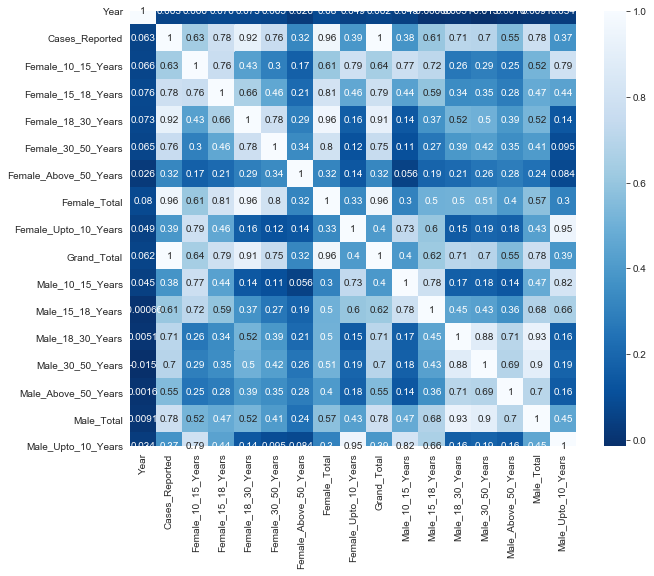

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr,cmap='Blues_r',annot=True)

In [27]:
df.isnull().head(20)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,Male_10_15_Years,Male_15_18_Years,Male_18_30_Years,Male_30_50_Years,Male_Above_50_Years,Male_Total,Male_Upto_10_Years
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,True,True,True,False,True,False,False,True,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.isnull().sum()

Area_Name                  0
Year                       0
Group_Name                 0
Sub_Group_Name             0
Cases_Reported             7
Female_10_15_Years       391
Female_15_18_Years       338
Female_18_30_Years       309
Female_30_50_Years       450
Female_Above_50_Years    621
Female_Total             162
Female_Upto_10_Years     495
Grand_Total               59
Male_10_15_Years         483
Male_15_18_Years         488
Male_18_30_Years         367
Male_30_50_Years         417
Male_Above_50_Years      558
Male_Total               257
Male_Upto_10_Years       471
dtype: int64

In [29]:
df.shape

(3569, 20)

In [30]:
df.dropna(axis=0,how='any',inplace=True)

In [31]:
df.shape

(2890, 20)

In [32]:
df.isnull().sum()

Area_Name                0
Year                     0
Group_Name               0
Sub_Group_Name           0
Cases_Reported           0
Female_10_15_Years       0
Female_15_18_Years       0
Female_18_30_Years       0
Female_30_50_Years       0
Female_Above_50_Years    0
Female_Total             0
Female_Upto_10_Years     0
Grand_Total              0
Male_10_15_Years         0
Male_15_18_Years         0
Male_18_30_Years         0
Male_30_50_Years         0
Male_Above_50_Years      0
Male_Total               0
Male_Upto_10_Years       0
dtype: int64

In [33]:
df.isnull().head(20)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,Male_10_15_Years,Male_15_18_Years,Male_18_30_Years,Male_30_50_Years,Male_Above_50_Years,Male_Total,Male_Upto_10_Years
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


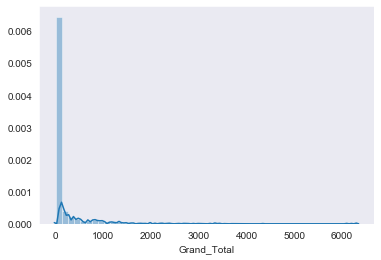

In [34]:
sns.distplot(df['Grand_Total'])

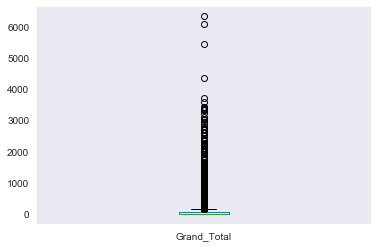

In [35]:
df['Grand_Total'].plot.box()

In [37]:
df.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name', 'Cases_Reported',
       'Female_10_15_Years', 'Female_15_18_Years', 'Female_18_30_Years',
       'Female_30_50_Years', 'Female_Above_50_Years', 'Female_Total',
       'Female_Upto_10_Years', 'Grand_Total', 'Male_10_15_Years',
       'Male_15_18_Years', 'Male_18_30_Years', 'Male_30_50_Years',
       'Male_Above_50_Years', 'Male_Total', 'Male_Upto_10_Years'],
      dtype='object')

In [36]:
df.dtypes

Area_Name                 object
Year                       int64
Group_Name                object
Sub_Group_Name            object
Cases_Reported           float64
Female_10_15_Years       float64
Female_15_18_Years       float64
Female_18_30_Years       float64
Female_30_50_Years       float64
Female_Above_50_Years    float64
Female_Total             float64
Female_Upto_10_Years     float64
Grand_Total              float64
Male_10_15_Years         float64
Male_15_18_Years         float64
Male_18_30_Years         float64
Male_30_50_Years         float64
Male_Above_50_Years      float64
Male_Total               float64
Male_Upto_10_Years       float64
dtype: object

In [38]:
area_name=pd.get_dummies(df['Area_Name'],drop_first=True,prefix='Area_Name')
group=pd.get_dummies(df['Group_Name'],drop_first=True,prefix='Group_Name')
sub_group=pd.get_dummies(df['Sub_Group_Name'],drop_first=True,prefix='Sub_Group_Name')

In [40]:
df.drop(['Area_Name','Group_Name','Sub_Group_Name'],axis=1,inplace=True)

In [41]:
for i in [area_name,group,sub_group]:
    df=pd.concat([df,i],axis=1)

In [42]:
df.head()

,Year,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Grand_Total,...,Sub_Group_Name_05. For Marriage,Sub_Group_Name_06. For Prostitution,Sub_Group_Name_07. For Ransom,Sub_Group_Name_08. For Revenge,Sub_Group_Name_09. For Sale,Sub_Group_Name_10. For Selling Bodyparts,Sub_Group_Name_11. For Slavery,Sub_Group_Name_12. For Unlawful Activity,Sub_Group_Name_13. Other Purposes,Sub_Group_Name_14. Total (Sum of 1-13 Above)
0,2001,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,...,0,0,0,0,0,0,0,0,0,0
1,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2001,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,0,0,0,0,0,0,0,0,0,0
4,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x=df.drop('Grand_Total',axis=1).head()
x

,Year,Cases_Reported,Female_10_15_Years,Female_15_18_Years,Female_18_30_Years,Female_30_50_Years,Female_Above_50_Years,Female_Total,Female_Upto_10_Years,Male_10_15_Years,...,Sub_Group_Name_05. For Marriage,Sub_Group_Name_06. For Prostitution,Sub_Group_Name_07. For Ransom,Sub_Group_Name_08. For Revenge,Sub_Group_Name_09. For Sale,Sub_Group_Name_10. For Selling Bodyparts,Sub_Group_Name_11. For Slavery,Sub_Group_Name_12. For Unlawful Activity,Sub_Group_Name_13. Other Purposes,Sub_Group_Name_14. Total (Sum of 1-13 Above)
0,2001,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2001,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y=df['Grand_Total'].head()
y

0     8.0
1     0.0
2     0.0
3    18.0
4     0.0
Name: Grand_Total, dtype: float64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [49]:
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)

In [50]:
print(predln)
print(mean_squared_error(y_test,predln))
print(mean_absolute_error(y_test,predln))

[0.11421099 0.11421099]
0.013044149135496081
0.11421098517872999


In [55]:
from sklearn.externals import joblib

In [56]:
joblib.dump(ln,'kidnapfile.obj')

['kidnapfile.obj']